In [224]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [274]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import helper
pd.options.display.max_columns = None

In [10]:
player_rankings = pd.read_csv("rankings_1973-2017_csv.csv")
player_rankings = player_rankings.drop(columns=['rank_text'])

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
player_rankings.head()

,week_title,week_year,week_month,week_day,rank_number,move_positions,move_direction,player_age,ranking_points,tourneys_played,player_url,player_slug,player_id
0,2017.11.20,2017,11,20,1,NaN,NaN,31.0,10645,18,/en/players/rafael-nadal/n409/overview,rafael-nadal,n409
1,2017.11.20,2017,11,20,2,NaN,NaN,36.0,9605,17,/en/players/roger-federer/f324/overview,roger-federer,f324
2,2017.11.20,2017,11,20,3,3.0,up,26.0,5150,23,/en/players/grigor-dimitrov/d875/overview,grigor-dimitrov,d875
3,2017.11.20,2017,11,20,4,1.0,down,20.0,4610,25,/en/players/alexander-zverev/z355/overview,alexander-zverev,z355
4,2017.11.20,2017,11,20,5,1.0,down,24.0,4015,27,/en/players/dominic-thiem/tb69/overview,dominic-thiem,tb69


In [4]:
player_overview = pd.read_csv("player_overviews_unindexed_csv.csv")

In [5]:
player_overview.head()

,player_id,player_slug,first_name,last_name,player_url,flag_code,residence,birthplace,birthdate,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,ricardo-acuna,Ricardo,Acuna,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",1958.01.13,1958.0,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,sadiq-abdullahi,Sadiq,Abdullahi,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,1960.02.02,1960.0,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,nelson-aerts,Nelson,Aerts,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",1963.04.25,1963.0,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,egan-adams,Egan,Adams,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",1959.06.15,1959.0,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,ronald-agenor,Ronald,Agenor,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",1964.11.13,1964.0,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


In [6]:
joined = player_rankings.merge(player_overview, left_on='player_id', right_on='player_id', how='left')

In [24]:
joined['flag_code'][:100].value_counts()[:15].dropna().shape

(15,)

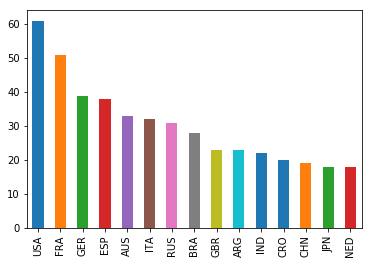

In [79]:
joined['flag_code'][101:].value_counts()[:15].plot(kind='bar')

In [68]:
flag_grouped = joined.groupby(['flag_code']).count()

In [96]:
joined['flag_code'][:100].value_counts()[:15].to_json(orient='index')

'{"FRA":10,"USA":9,"GER":8,"ESP":8,"ARG":7,"SRB":5,"RUS":5,"ITA":4,"GBR":3,"CRO":3,"AUS":3,"JPN":3,"BEL":2,"CAN":2,"AUT":2}'

In [25]:
def top100_to_json():
    my_dict = {}
    for i in range(1973, 2018):
        by_year = (joined.loc[joined['week_year'] == i]).iloc[:2000,:]
        counts = joined['flag_code'][:100].value_counts()[:15].dropna()
        json_decoded = json.loads(counts.to_json(orient='index'))
        
        my_dict[i] = json_decoded
        
    with open('top100_players.json', 'w') as json_file:
        json.dump(my_dict, json_file)
    

In [26]:
top100_to_json()
    

## Players and Matches

In [47]:
player_info = pd.read_csv('player_overviews_unindexed_csv.csv')
player_info.head()

,player_id,player_slug,first_name,last_name,player_url,flag_code,residence,birthplace,birthdate,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,ricardo-acuna,Ricardo,Acuna,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",1958.01.13,1958.0,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,sadiq-abdullahi,Sadiq,Abdullahi,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,1960.02.02,1960.0,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,nelson-aerts,Nelson,Aerts,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",1963.04.25,1963.0,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,egan-adams,Egan,Adams,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",1959.06.15,1959.0,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,ronald-agenor,Ronald,Agenor,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",1964.11.13,1964.0,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


In [119]:
match_stats = pd.read_csv('match_stats_1991-2016_unindexed_csv.csv')
match_stats['total_serves'] = match_stats.loser_service_points_total + match_stats.winner_service_points_total
match_stats['total_aces'] = match_stats.winner_aces.dropna() + match_stats.loser_aces.dropna()
match_stats['avg_aces'] = match_stats.total_aces.apply(np.median)
match_stats['total_aces_proportion'] = match_stats.total_aces / match_stats.total_serves
match_stats['match_duration_adjusted'] = match_stats.match_duration.dropna().apply(helper.adjust)
match_stats.head()

/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


,tourney_order,match_id,match_stats_url_suffix,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,...,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,total_serves,total_aces,avg_aces,aces_proportion,match_duration_adjusted
0,0,1991-7308-k181-l206,/en/scores/1991/7308/MS002/match-stats,01:20:00,80.0,3.0,0.0,0.0,65.0,29.0,...,11.0,24.0,65.0,61.0,134.0,134.0,4.0,4.0,0.029851,60.0
1,0,1991-7308-k181-s351,/en/scores/1991/7308/MS001/match-stats,01:29:00,89.0,1.0,2.0,44.0,65.0,31.0,...,12.0,22.0,65.0,68.0,148.0,148.0,13.0,13.0,0.087838,60.0
2,0,1991-7308-k181-s424,/en/scores/1991/7308/MS005/match-stats,00:55:00,55.0,0.0,1.0,17.0,36.0,11.0,...,7.0,12.0,36.0,32.0,90.0,90.0,2.0,2.0,0.022222,0.0
3,0,1991-7308-a031-s331,/en/scores/1991/7308/MS013/match-stats,01:09:00,69.0,2.0,3.0,44.0,58.0,28.0,...,9.0,23.0,58.0,52.0,114.0,114.0,5.0,5.0,0.043860,60.0
4,0,1991-7308-k030-w136,/en/scores/1991/7308/MS009/match-stats,01:29:00,89.0,6.0,3.0,37.0,71.0,25.0,...,10.0,27.0,71.0,59.0,135.0,135.0,10.0,10.0,0.074074,60.0


In [124]:
# o_match_stats = match_stats[match_stats.match_duration_adjusted <= 180]

print(match_stats.winner_total_points_won.mean())
match_stats.loser_total_points_won.mean()

84.02933359475415


69.79212687623902

In [ ]:
plt.plot

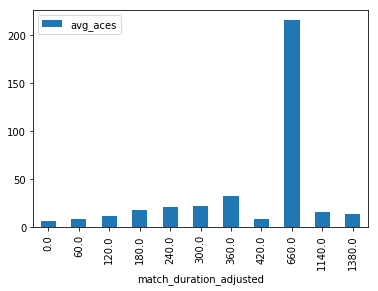

In [120]:
match_stats[['match_duration_adjusted', 'avg_aces']].dropna().set_index('match_duration_adjusted').\
groupby('match_duration_adjusted').median().plot(kind='bar')


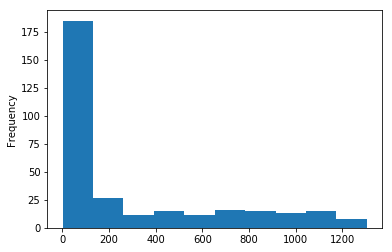

In [37]:
# data wrangling for x feature vs match_time
match_stats.match_duration.value_counts().plot('hist')

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)

match_stats.plot.barh( x='match_duration', y="aces_proportion", ax=ax)
# ax.set_xlim(0, 500)

In [44]:
match_stats.match_duration.max()

1412.0

## Point-by-point analysis

In [284]:
pbp = pd.read_csv('ATP_Singles_pbpx.txt')
pbp['pbpx'] = pbp.pbp + pbp.winner.apply(str)
pbp = pbp.drop('pbp', axis=1)
pbp['duration'] = pbp.duration.str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])).apply(helper.adjust)

In [285]:
pbp['aces_prop'] = pbp.pbpx.apply(helper.pbp_decomp).apply(lambda x: (x[0][0] + x[2][1]) / x[0][3]\
if x[0][3] else 0)

In [286]:
pbp['DF_prop'] = pbp.pbpx.apply(helper.pbp_decomp).apply(lambda x: (x[0][2]+x[2][2]) / x[0][3])

In [231]:
grouped = pbp.groupby('duration')['Lhlf_SL_prop', 'Lhlf_sL_prop'].mean()
LiQc = grouped[(grouped.index >= 45) & (grouped.index <= 240)]

In [215]:
grouped = pbp.groupby('duration')['Lhlf_S_prop', 'Lhlf_s_prop'].mean()
iQC = grouped[(grouped.index >= 45) & (grouped.index <= 240)]

In [219]:
iQC.reset_index(drop=True)
iQC.to_json('iQC.json')

In [233]:
LiQc.reset_index(drop=True)
LiQc.to_json('LiQC.json')

In [287]:
gpd = pbp.groupby('duration')['aces_prop', 'DF_prop'].mean()
gg = gpd[(gpd.index >= 60) & (gpd.index <= 240)]
gg.reset_index(drop=True)
gg.to_json('gg.json')

## Demographic Modeling

In [245]:
matches = pd.DataFrame()
for i in range(2007, 2018): 
    df = pd.read_csv('atp_matches_{}.csv'.format(i))
    matches = pd.concat([matches, df], axis=0)
matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2007-1536,Madrid Masters,Hard,48,M,20071015,1,104068,NaN,Q,Robby Ginepri,R,183.0,USA,25.021218,103781,NaN,NaN,Jurgen Melzer,L,183.0,AUT,26.398357,2-6 7-6(2) 6-4,3,R64,117.0,4.0,3.0,99.0,64.0,40.0,23.0,15.0,4.0,7.0,4.0,2.0,89.0,61.0,43.0,16.0,15.0,4.0,6.0,72.0,535.0,56.0,625.0
1,2007-1536,Madrid Masters,Hard,48,M,20071015,2,102860,NaN,Q,Agustin Calleri,R,183.0,ARG,31.082820,104098,NaN,NaN,Dmitry Tursunov,R,185.0,RUS,24.840520,3-6 7-6(4) 6-4,3,R64,108.0,9.0,2.0,83.0,44.0,35.0,28.0,15.0,0.0,1.0,6.0,2.0,91.0,53.0,43.0,23.0,16.0,0.0,1.0,50.0,660.0,28.0,950.0
2,2007-1536,Madrid Masters,Hard,48,M,20071015,3,102905,NaN,Q,Stefan Koubek,L,175.0,AUT,30.781656,103813,NaN,NaN,Jarkko Nieminen,L,185.0,FIN,26.228611,6-3 3-6 6-4,3,R64,98.0,5.0,3.0,78.0,42.0,32.0,18.0,14.0,3.0,7.0,3.0,4.0,94.0,63.0,37.0,16.0,14.0,8.0,13.0,68.0,565.0,29.0,935.0
3,2007-1536,Madrid Masters,Hard,48,M,20071015,4,103852,NaN,WC,Feliciano Lopez,L,188.0,ESP,26.067077,103835,NaN,NaN,Filippo Volandri,R,183.0,ITA,26.108145,6-3 6-2,3,R64,79.0,5.0,2.0,57.0,37.0,30.0,7.0,9.0,3.0,4.0,0.0,3.0,42.0,18.0,12.0,10.0,8.0,1.0,5.0,42.0,741.0,43.0,731.0
4,2007-1536,Madrid Masters,Hard,48,M,20071015,5,103333,NaN,NaN,Ivo Karlovic,R,208.0,CRO,28.626968,103498,NaN,NaN,Marat Safin,R,193.0,RUS,27.715264,6-3 6-4,3,R64,58.0,17.0,2.0,53.0,38.0,34.0,7.0,10.0,2.0,2.0,3.0,2.0,47.0,26.0,21.0,12.0,9.0,2.0,4.0,24.0,1258.0,36.0,855.0


In [252]:
dct = {}
dct['aces'] = matches.w_ace.mean() + matches.l_ace.mean()
dct['df'] = matches.w_df.mean() + matches.l_df.mean()
dct['s&v'] = matches.w_df.mean() + matches.l_df.mean()
dct['1stS_rally'] = matches.w_1stWon.mean() + matches.l_1stWon.mean()
dct['2ndS_rally'] = matches.w_2ndWon.mean() + matches.l_2ndWon.mean()
dct['unforced_errors'] = helper.calc_total_points(matches) - np.sum(list(dct.values()))

In [260]:
dct['osr'] = matches.l_bpFaced.mean()*4 + matches.w_bpFaced.mean()*4

In [261]:
df = pd.DataFrame(dct, index = [1])
df.to_json('point_breakdown.json')